## A/B Test

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [102]:
file_path = 'C:/Users/rohit/Desktop/Projects_Data_Science/Recommendation_data.xlsx'
data = pd.read_excel(file_path)

data.head(5)

,customer_id,Recommendation_name,Recommendation_date,suggestion_type,purchase_flag
0,1.0,Recommend_screenguard,2021-07-02,With phone,0.0
1,2.0,Recommend_screenguard,2021-07-03,With phone,0.0
2,3.0,Recommend_screenguard,2021-07-04,With cover,1.0
3,4.0,Recommend_screenguard,2021-07-05,With phone,0.0
4,5.0,Recommend_screenguard,2021-07-06,With cover,1.0


In [103]:
data.shape

(868, 5)

In [104]:
data.groupby("suggestion_type")["purchase_flag"].value_counts()

suggestion_type  purchase_flag
With cover       0.0              206
                 1.0              130
With phone       0.0              258
                 1.0              117
Name: count, dtype: int64

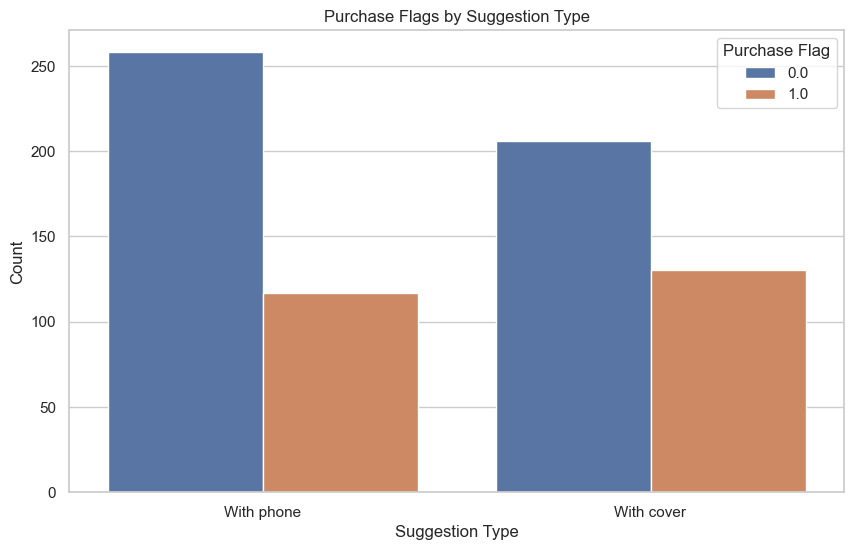

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(x='suggestion_type', hue='purchase_flag', data=data)
plt.title('Purchase Flags by Suggestion Type')
plt.xlabel('Suggestion Type')
plt.ylabel('Count')
plt.legend(title='Purchase Flag')
plt.show()

In [106]:
CT_values = pd.crosstab(data["suggestion_type"],data["purchase_flag"]).values
CT_values

array([[206, 130],
       [258, 117]], dtype=int64)

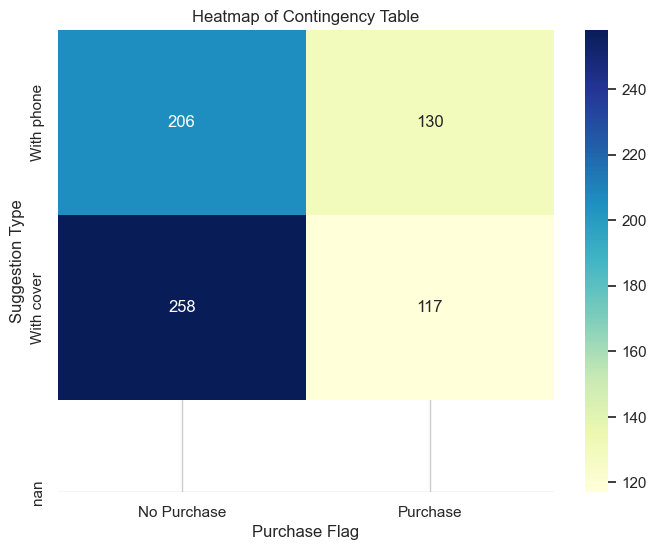

In [107]:
plt.figure(figsize=(8, 6))
sns.heatmap(CT_values, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['No Purchase', 'Purchase'], yticklabels=data['suggestion_type'].unique())
plt.title('Heatmap of Contingency Table')
plt.xlabel('Purchase Flag')
plt.ylabel('Suggestion Type')
plt.show()

In [108]:

with_phone_rate = 117 / (117 + 258)
with_cover_rate = 130 / (206 + 130)

print("Conversion Rate with Phone:", with_phone_rate)
print("Conversion Rate with Cover:", with_cover_rate)


Conversion Rate with Phone: 0.312
Conversion Rate with Cover: 0.3869047619047619


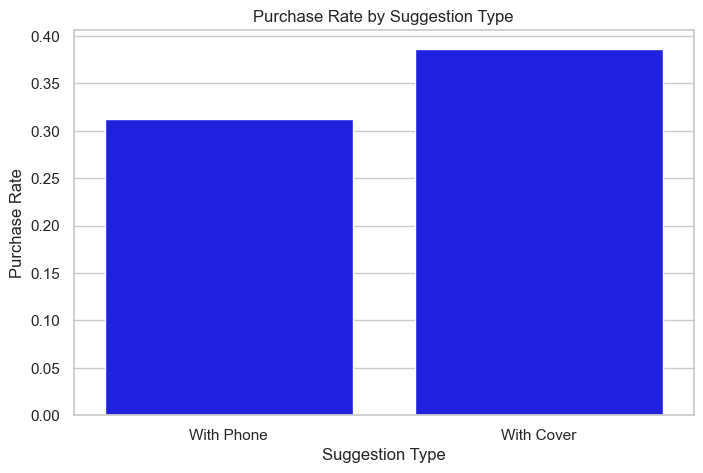

In [109]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(rates.keys()), y=list(rates.values()), color='blue')
plt.title('Purchase Rate by Suggestion Type')
plt.xlabel('Suggestion Type')
plt.ylabel('Purchase Rate')
plt.show()


In [110]:
conversions_phone = 117
conversions_cover = 130
n_phone = 117 + 258
n_cover = 130 + 206

p_phone = with_phone_rate
p_cover = with_cover_rate

p_pooled = (conversions_phone + conversions_cover) / (n_phone + n_cover)

se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_phone + 1/n_cover))

z = (p_phone - p_cover) / se

p_value = stats.norm.sf(abs(z)) * 2  # two-tailed test

print(f"Z-score: {z:.4f}")
print(f"P-value: {p_value:.4f}")


Z-score: -2.0942
P-value: 0.0362


In [111]:
prob = 0.95
alpha = 1.0 - prob
print('significance = %.3f , p=%.3f' % (alpha , p_value))
if p_value <= alpha:
    print('Dependent , we can reject H0 safety')
else:
    print('Independent, no suffiecient evidence to reject H0')

significance = 0.050 , p=0.036
Dependent , we can reject H0 safety
